In [1]:
import sys
from pathlib import Path

project_root = Path('..').resolve()
sys.path.append(str(project_root))

print('Added to Python path:', project_root)


Added to Python path: C:\Users\NeosT\OneDrive\Skrivbord\VsCode-Projects\SakuraScan\SakuraScan


In [12]:
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

def show_sample_images(base_dir: str = '../Data/source_images', max_images: int = 9) -> None:
    """
    Display a clean grid of sample images from the given base directory.
    Shows up to `max_images` images and suppresses any text output.
    """
    data_dir = Path(base_dir)

    # Collect images with common extensions (case-insensitive)
    valid_suffixes = {'.jpg', '.jpeg', '.png'}
    image_paths = [
        p for p in data_dir.rglob('*')
        if p.suffix.lower() in valid_suffixes
    ]

    if not image_paths:
        print(f'No images found in {data_dir}')
        return

    # Limit to max_images
    image_paths = image_paths[:max_images]

    # Compute layout
    n = len(image_paths)
    cols = 3
    rows = (n + cols - 1) // cols

    plt.figure(figsize=(10, 10))
    for i, img_path in enumerate(image_paths):
        img = Image.open(img_path)
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


In [3]:
from src.dataset import SakuraDataset, train_val_split

In [4]:
dataset = SakuraDataset(base_dir='../Data/source_images')

train_indices, val_indices = train_val_split(
    dataset,
    val_ratio=0.2,
    shuffle=True,
    seed=42
)

print('Total samples:', len(dataset))
print('Train samples:', len(train_indices))
print('Validation samples:', len(val_indices))

Total samples: 4208
Train samples: 3366
Validation samples: 842


In [5]:
from collections import Counter

labels = [label for _, label in dataset.samples]
label_counts = Counter(labels)

print('Label counts (by index):', label_counts)
print('Classes:', dataset.classes)

for index, class_name in enumerate(dataset.classes):
    count = label_counts.get(index, 0)
    print(f'Class {index} ({class_name}): {count} images')

Label counts (by index): Counter({0: 2104, 1: 2104})
Classes: ['healthy', 'powdery_mildew']
Class 0 (healthy): 2104 images
Class 1 (powdery_mildew): 2104 images


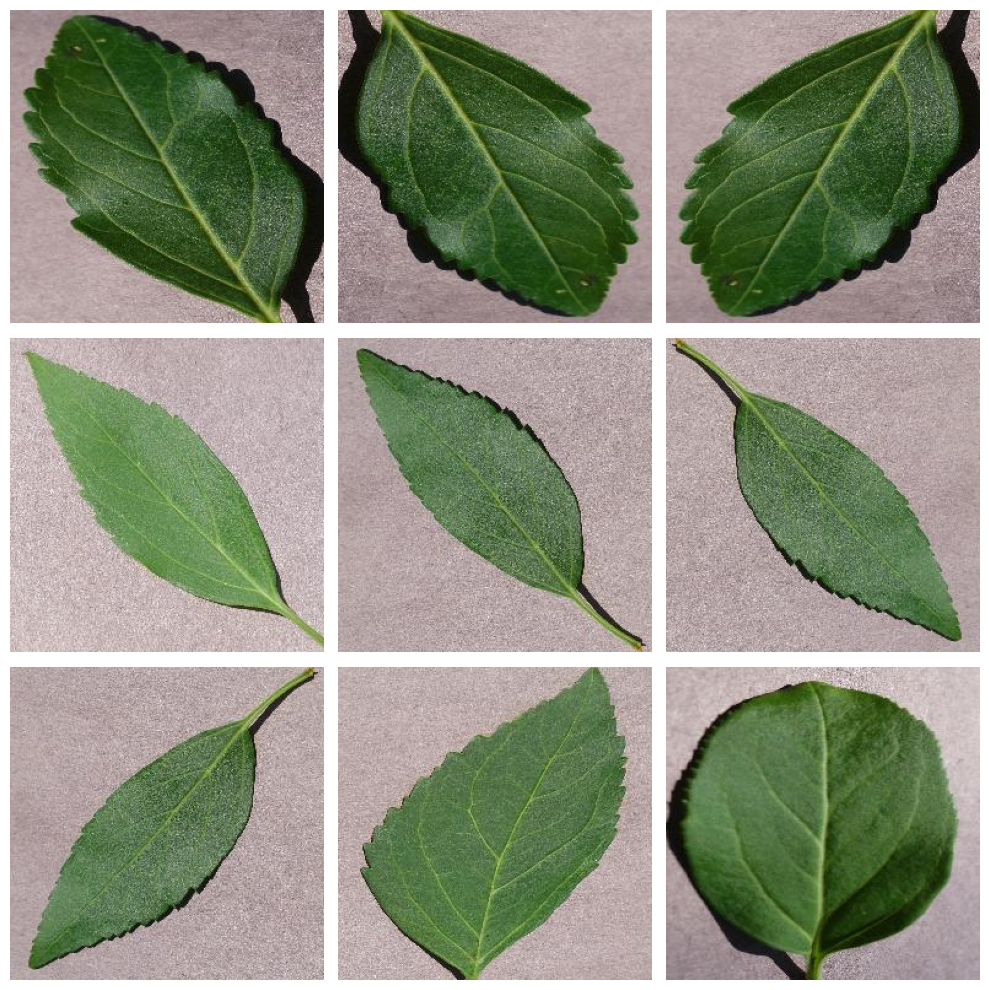

In [13]:
show_sample_images(base_dir='../Data/source_images/healthy')

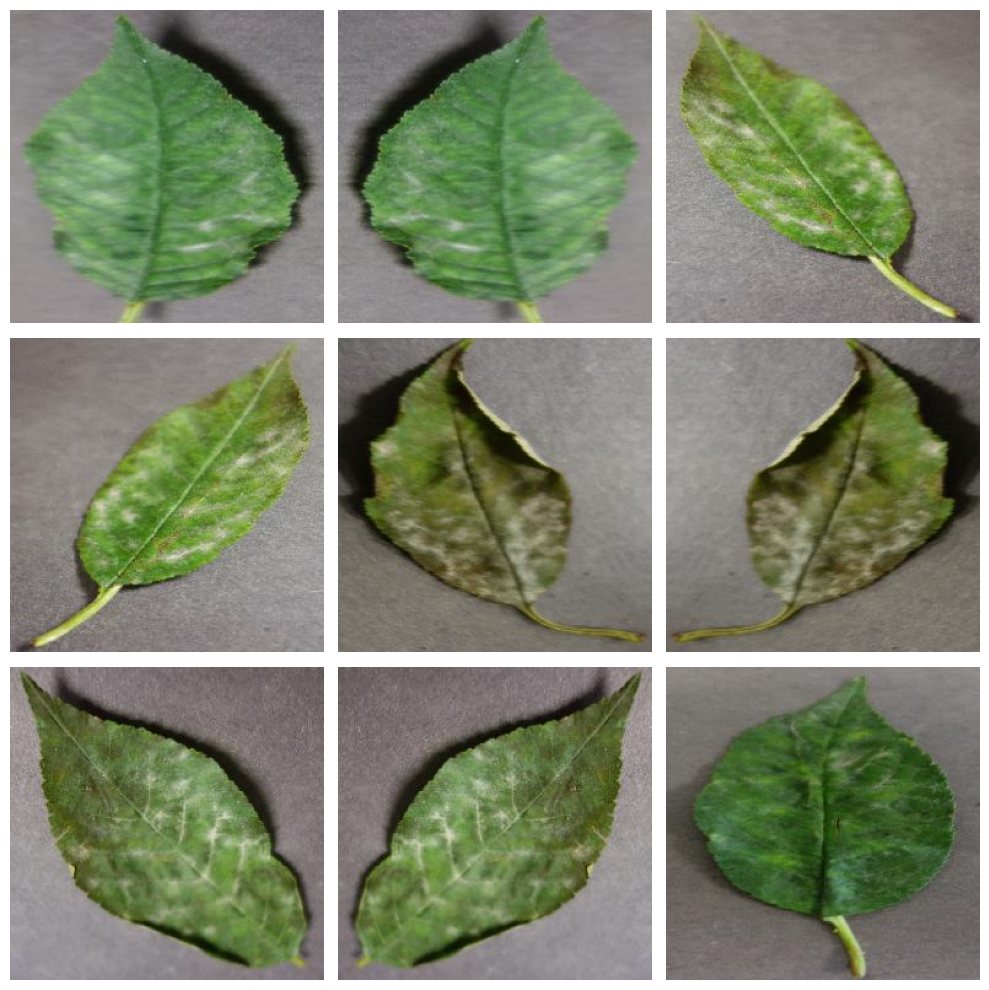

In [14]:
show_sample_images(base_dir='../Data/source_images/powdery_mildew')